# The Objective of this project is to Segmenting Customers Based on purchase Behaviour

## Step 1: Load the Data

In [3]:
import os
os.chdir(r'C:\Users\Lenovo\Downloads\Segmenting_customers')
print(os.listdir())

['Cleaned_dataset.csv', 'duplicate_raws.csv', 'Online_Retail.csv', 'Online_Retail.xlsx', 'rows_with_zero_unitprice.csv', 'Segmenting_Customers_Based _On_Purchase_Behaviour.html', 'Segmenting_Customers_Based _On_Purchase_Behaviour.ipynb']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
# Changed encoding to 'ISO-8859-1' (ANSI) because the file does not support UTF-8 and requires compatibility.
df = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')

In [6]:
# Let's peak into the data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541900,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541901,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541902,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541903,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [7]:
# Basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541905 entries, 0 to 541904
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541905 non-null  object 
 1   StockCode    541905 non-null  object 
 2   Description  540451 non-null  object 
 3   Quantity     541905 non-null  int64  
 4   InvoiceDate  541905 non-null  object 
 5   UnitPrice    541905 non-null  float64
 6   CustomerID   406825 non-null  float64
 7   Country      541905 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


## Step 2: Data Cleaning

In [8]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Let's check how the severe missing values is in percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268313
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926878
Country         0.000000
dtype: float64


In [10]:
missing_customerid = df[df['CustomerID'].isnull()]
print(missing_customerid)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541532    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541533    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541534    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541535    581498     85174                S/4 CACTI CANDLES         1   
541536    581498       DOT                   DOTCOM POSTAGE         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
622     01-12-2010 11:52       0.00         NaN  United K

In [11]:
# First, fill the missing CustomerID with 'Unknown'
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

# Create the flag column: 1 for known customers, 0 for unknown customers
df['CustomerID_flag'] = (df['CustomerID'] != 'Unknown').astype(int)

# Check the result
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541900    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541901    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541902    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541903    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541904    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice CustomerID         Country  \
0       0

In [12]:
# Handling Decription missing values. Many data is also missing in such rows.
df = df.dropna(subset=['Description'])

In [13]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
CustomerID_flag    0
dtype: int64

In [14]:
# Check for Duplicate entries
print(df.duplicated().sum())

5268


In [15]:
# Display raws that are duplicates
duplicate_raws = df[df.duplicated()]
print(duplicate_raws)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541671    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541685    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541688    581538     22992             REVOLVER WOODEN RULER          1   
541695    581538     22694                       WICKER STAR          1   
541697    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice CustomerID         Country  \
517     01-12-2010 11:45       1.

In [16]:
import re
# Strip whitespace from all string columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Remove non-printable characters from all string columns
df = df.map(lambda x: re.sub(r'\s+', ' ', x) if isinstance(x, str) else x)
# Convert all string columns to lowercase
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

# Check for duplicates across all columns
df.duplicated().sum()


5268

In [17]:
# Let's check the raws in excel for clear view.
duplicate_raws.to_csv(r'C:\Users\Lenovo\Downloads\Segmenting_customers\duplicate_raws.csv', index=True)

## Duplicate Check Explanation

In reviewing the dataset, we performed a check for duplicate entries based on the following key columns:

- **InvoiceNo**: Each invoice number is typically unique to a transaction. However, when multiple items are purchased under the same invoice, there will be multiple entries with the same **InvoiceNo**.

- **Quantity**: The quantity of items purchased can vary for each entry within the same invoice, resulting in separate rows for different items.

- **InvoiceDate**: The invoice date is generally the same for all items in a single transaction, but slight variations in the exact time recorded might cause multiple rows to appear.

- **CustomerID**: The **CustomerID** corresponds to the customer making the purchase. Since a customer may buy multiple items under the same invoice, this will appear as repeated rows for the same transaction.

- **Country**: The **Country** indicates the location of the customer. Multiple items from the same invoice may share the same country, which results in multiple rows under the same country for the same customer.

### Conclusion:

After investigating, we confirm that the dataset does not contain true duplicate rows. The system marks multiple entries as duplicates because these columns (InvoiceNo, Quantity, InvoiceDate, CustomerID, and Country) may repeat for the same transaction, where different items are bought under the same invoice.

These entries are not actual duplicates but represent different items purchased under the same invoice. If necessary, we can remove entries considered duplicates based on these columns or further refine the analysis criteria.



In [18]:
# Let's find out invalid or negative quantities.
print((df['Quantity'] <= 0).sum())

9762


In [19]:
negative_quantity = df[df['Quantity'] <=0]
print(negative_quantity)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          discount        -1   
154      C536383    35004C    set of 3 coloured flying ducks        -1   
235      C536391     22556     plasters in tin circus parade       -12   
236      C536391     21984   pack of 12 pink paisley tissues       -24   
237      C536391     21983   pack of 12 blue paisley tissues       -24   
...          ...       ...                               ...       ...   
540445   C581490     23144   zinc t-light holder stars small       -11   
541537   C581499         M                            manual        -1   
541711   C581568     21258        victorian sewing box large        -5   
541712   C581569     84978  hanging heart jar t-light holder        -1   
541713   C581569     20979     36 pencils tube red retrospot        -5   

             InvoiceDate  UnitPrice CustomerID         Country  \
141     01-12-2010 09:41      27.50    14527.

In [20]:
# Flag negative quantities for potential future analysis, allowing for further exploration if needed.
df['Negative_Quantity_Flag'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

In [21]:
# Count rows where unitprice is zero
zero_unitprice_count = (df['UnitPrice'] == 0).sum()

print(zero_unitprice_count)


1061


In [22]:
# Filter rows where unitprice is zero
rows_with_zero_unitprice = df[df['UnitPrice'] == 0]

# Display rows with zero unitprice and their descriptions
print(rows_with_zero_unitprice[['Description', 'UnitPrice']])

                         Description  UnitPrice
6391                          amazon        0.0
6392                          amazon        0.0
7313                               ?        0.0
9302    round cake tin vintage green        0.0
13217                          check        0.0
...                              ...        ...
535332                         check        0.0
536904                       missing        0.0
538500  polyester filler pad 45x45cm        0.0
538501  polyester filler pad 40x40cm        0.0
538915                       smashed        0.0

[1061 rows x 2 columns]


In [23]:
rows_with_zero_unitprice.to_csv(r'C:\Users\Lenovo\Downloads\Segmenting_customers\rows_with_zero_unitprice.csv', index=False)

In [24]:
# Replace 0 values in Quantity with NaN
df['UnitPrice'] = df['UnitPrice'].replace(0, np.nan)

# Check the result
print(df[df['UnitPrice'].isna()].head())

      InvoiceNo StockCode                   Description  Quantity  \
6391     536941     22734                        amazon        20   
6392     536942     22139                        amazon        15   
7313     537032     21275                             ?       -30   
9302     537197     22841  round cake tin vintage green         1   
13217    537425    84968F                         check       -20   

            InvoiceDate  UnitPrice CustomerID         Country  \
6391   03-12-2010 12:08        NaN    Unknown  united kingdom   
6392   03-12-2010 12:08        NaN    Unknown  united kingdom   
7313   03-12-2010 16:50        NaN    Unknown  united kingdom   
9302   05-12-2010 14:02        NaN    12647.0         germany   
13217  06-12-2010 15:35        NaN    Unknown  united kingdom   

       CustomerID_flag  Negative_Quantity_Flag  
6391                 0                       0  
6392                 0                       0  
7313                 0                       1 

In [25]:
# Let's do the Imputation
# Impute missing UnitPrice by StockCode (mean of UnitPrice by StockCode)
df['UnitPrice'] = df.groupby('StockCode')['UnitPrice'].transform(lambda x: x.fillna(x.mean()))

# Impute remaining missing UnitPrice by Description (mean of UnitPrice by Description)
df['UnitPrice'] = df.groupby('Description')['UnitPrice'].transform(lambda x: x.fillna(x.mean()))

# If any values are still missing, impute with the global mean of UnitPrice
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mean())

# Verifying if any missing values remain
print(df[df['UnitPrice'].isna()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CustomerID_flag, Negative_Quantity_Flag]
Index: []


In [26]:
# let's check further.
print(df[df['UnitPrice'].isna() | (df['UnitPrice'] == 0)])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CustomerID_flag, Negative_Quantity_Flag]
Index: []


In [27]:
# Check the summary statistics of UnitPrice
print(df['UnitPrice'].describe())

# Check the first few rows to ensure imputation worked correctly
print(df.head())

count    540451.000000
mean          4.637419
std          96.900040
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

        InvoiceDate  UnitPrice CustomerID         Country  CustomerID_flag  \
0  01-12-2010 08:26       2.55    17850.0  united kingdom                1   
1  01-12-2010 08:26       3.39    17850.0  united kingdom                1   
2  01-12-2010 08:26       2.75    17850.0  united kingdom                1   
3  01-12-2010 08:26       3.39    17850

In [28]:
# Check rows with extreme UnitPrice values
extreme_values = df[df['UnitPrice'] < 0 | (df['UnitPrice'] > 1000)]
print(extreme_values)

       InvoiceNo StockCode      Description  Quantity       InvoiceDate  \
299981   A563186         B  adjust bad debt         1  12-08-2011 14:51   
299982   A563187         B  adjust bad debt         1  12-08-2011 14:52   

        UnitPrice CustomerID         Country  CustomerID_flag  \
299981  -11062.06    Unknown  united kingdom                0   
299982  -11062.06    Unknown  united kingdom                0   

        Negative_Quantity_Flag  
299981                       0  
299982                       0  


In [29]:
df = df[df['UnitPrice'] > 0]

In [30]:
# Remove rows where Description contains "adjust bad debt"
df = df[~df['Description'].str.contains('adjust bad debt', case=False, na=False)]

In [31]:
# Check rows with extreme UnitPrice values
extreme_values = df[df['UnitPrice'] < 0 | (df['UnitPrice'] > 1000)]
print(extreme_values)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CustomerID_flag, Negative_Quantity_Flag]
Index: []


In [32]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_flag,Negative_Quantity_Flag
0,536365,85123A,white hanging heart t-light holder,6,01-12-2010 08:26,2.55,17850.0,united kingdom,1,0
1,536365,71053,white metal lantern,6,01-12-2010 08:26,3.39,17850.0,united kingdom,1,0
2,536365,84406B,cream cupid hearts coat hanger,8,01-12-2010 08:26,2.75,17850.0,united kingdom,1,0
3,536365,84029G,knitted union flag hot water bottle,6,01-12-2010 08:26,3.39,17850.0,united kingdom,1,0
4,536365,84029E,red woolly hottie white heart.,6,01-12-2010 08:26,3.39,17850.0,united kingdom,1,0
...,...,...,...,...,...,...,...,...,...,...
541900,581587,22613,pack of 20 spaceboy napkins,12,09-12-2011 12:50,0.85,12680.0,france,1,0
541901,581587,22899,children's apron dolly girl,6,09-12-2011 12:50,2.10,12680.0,france,1,0
541902,581587,23254,childrens cutlery dolly girl,4,09-12-2011 12:50,4.15,12680.0,france,1,0
541903,581587,23255,childrens cutlery circus parade,4,09-12-2011 12:50,4.15,12680.0,france,1,0


In [33]:
print("Cleaned Data:")

Cleaned Data:


## Step 3: Feature Engineering

In [34]:
# Create Total Price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convret InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format= '%d-%m-%Y %H:%M')

# Extract date components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   white hanging heart t-light holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B       cream cupid hearts coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
541900    581587     22613          pack of 20 spaceboy napkins        12   
541901    581587     22899          children's apron dolly girl         6   
541902    581587     23254         childrens cutlery dolly girl         4   
541903    581587     23255      childrens cutlery circus parade         4   
541904    581587     22138         baking set 9 piece retrospot         3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      

## Step 4: Exploratory Data Analysis (EDA)

In [35]:
# Top products by sales.
top_products = df.groupby('Description')['TotalPrice'] \
.sum() \
.sort_values(ascending=False) \
.head(10)

# Display the results
print("Top 10 Products by Total Revenue")
print(top_products)

Top 10 Products by Total Revenue
Description
dotcom postage                        206828.937030
regency cakestand 3 tier              164914.131178
white hanging heart t-light holder     99680.915236
party bunting                          98326.107740
jumbo bag red retrospot                92365.924805
rabbit night light                     66756.590000
postage                                66230.640000
paper chain kit 50's christmas         63791.940000
assorted colour bird ornament          58959.730000
chilli lights                          53788.384024
Name: TotalPrice, dtype: float64


In [36]:
# Top products by Quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity:")
print(top_quantity)

Top 10 Products by Quantity:
Description
world war 2 gliders asstd designs     53847
jumbo bag red retrospot               47363
assorted colour bird ornament         36381
popcorn holder                        36334
pack of 72 retrospot cake cases       36039
white hanging heart t-light holder    35317
rabbit night light                    30680
mini paint set vintage                26437
pack of 12 london tissues             26315
pack of 60 pink paisley cake cases    24753
Name: Quantity, dtype: int64


In [38]:
# Group by 'Country' and sum the 'TotalPrice'.
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Calculate the total sales
total_sales = country_sales.sum()

# Calculate the percentage of sales for each country
country_sales_percentage = (country_sales / total_sales) * 100

# Round the values to 2 decimal places
country_sales = country_sales.round(2)
country_sales_percentage = country_sales_percentage.round(4)

# Display the result
print("Sales by Country:")
print(country_sales)

print("\nSales Percentage by Country:")
print(country_sales_percentage)


Sales by Country:
Country
united kingdom          7802160.84
netherlands              285557.43
eire                     264114.80
germany                  222086.18
france                   197783.45
australia                138208.68
switzerland               56394.24
spain                     54829.69
belgium                   40910.96
sweden                    36595.91
japan                     35340.62
norway                    35184.77
portugal                  29367.02
finland                   22326.74
channel islands           20086.29
denmark                   18768.14
italy                     16890.51
cyprus                    12946.29
austria                   10154.32
hong kong                 10117.04
singapore                  9120.39
israel                     7907.82
poland                     7213.14
unspecified                4749.79
greece                     4710.52
iceland                    4310.00
canada                     3666.38
malta                      25

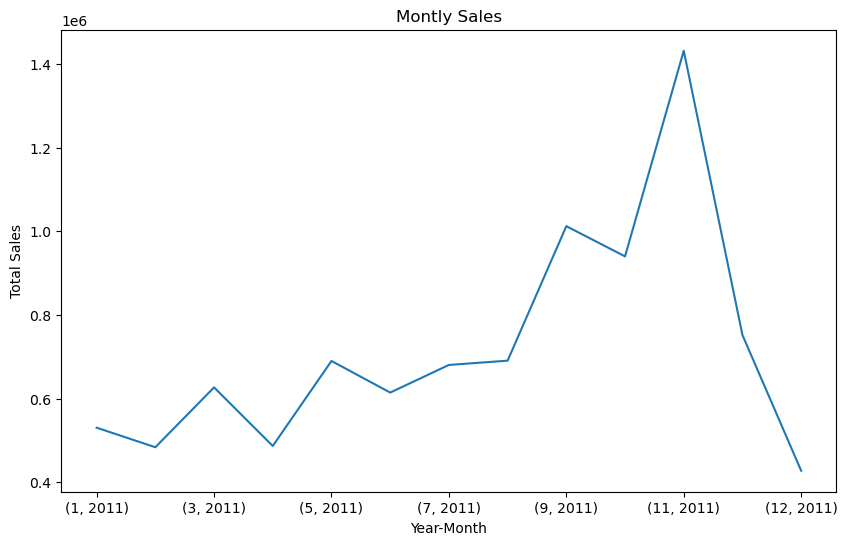

In [48]:
# Salse over time.
# Monthly Sales.
monthly_sales = df.groupby(['Month', 'Year'])['TotalPrice'].sum()

# Plot monthly sales.
monthly_sales.plot(kind='line', figsize=(10, 6), title="Montly Sales")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.savefig('Monthly Sales')
plt.show()

## Step 5: Customer Segmentation using RFM Analysis

In [40]:
# Group by InvoiceNo and count unique CustomerID values.
invoice_cutomer_counts = df.groupby('InvoiceNo')['CustomerID'].nunique()

# Check for invoices associated with more than one customer.
multiple_customer_invoices = invoice_cutomer_counts[invoice_cutomer_counts > 1]
print(f" Number of invoices linked to multiple customers: {len(multiple_customer_invoices)}")

 Number of invoices linked to multiple customers: 0


In [41]:
# Identified customer (CustomeID_flag = 1 )
customers_df = df[df['CustomerID_flag'] == 1]

# Guest transactions (CustomerID_flag = 0 )
guest_df = df[df['CustomerID_flag'] == 0] 

In [42]:
# Set reference date for recency calculation.
reference_date = customers_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM metrics for identified customers
rfm_customers = customers_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns.
rfm_customers.columns = ['Recency', 'Frequency', 'Monetary']

# Assign R, F, M scores using quintiles.
rfm_customers['R'] = pd.qcut(rfm_customers['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_customers['F'] = pd.qcut(rfm_customers['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_customers['M'] = pd.qcut(rfm_customers['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores.
rfm_customers['RFM_Score'] = rfm_customers[['R', 'F', 'M']].sum(axis=1)

In [43]:
# Set reference date for guest transactions.
reference_date_guest = guest_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM metrics for guest transactions.
rfm_guest = guest_df.groupby('InvoiceNo').agg({
    'InvoiceDate': lambda x: (reference_date_guest - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

# Rename columns.
rfm_guest.columns = ['Recency', 'Frequency', 'Monetary']

# Assign R, F, M scores using quintiles.
rfm_guest['R'] = pd.qcut(rfm_guest['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_guest['F'] = pd.qcut(rfm_guest['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_guest['M'] = pd.qcut(rfm_guest['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores.
rfm_guest['RFM_Score'] = rfm_guest[['R', 'F', 'M']].sum(axis=1)

In [44]:
# Segmentation for customers.
rfm_customers['Segment'] = rfm_customers['RFM_Score'].apply(lambda x:
                                                              'Champions' if x >= 12 else
                                                              'Loyal' if x >= 9 else
                                                              'Potential Loyalist' if x >= 6 else 'At Risk')

# Segmentaion for guest transactions.
rfm_guest['Segment'] = rfm_guest['RFM_Score'].apply(lambda x:
                                                    'Champions' if x >= 12 else 
                                                    'Loyal' if x >= 9 else 
                                                    'Potential Loyalist' if x >= 6 else 'At Risk')

In [45]:
# Add column to distinguish between identified and guest tracsaction.
rfm_customers['Type'] = 'Customers'
rfm_guest['Type'] = 'Guest'

# Combine both datasets.
rfm_combined = pd.concat([rfm_customers, rfm_guest])

# View segment counts for both types.
print(rfm_customers['Segment'].value_counts())
print(rfm_guest['Segment'].value_counts())

# View the combined RFM table.
print(rfm_customers.head())
print(rfm_guest.head())


Segment
Champions             1278
Potential Loyalist    1202
Loyal                 1006
At Risk                886
Name: count, dtype: int64
Segment
Loyal                 869
Potential Loyalist    686
Champions             399
At Risk               299
Name: count, dtype: int64
            Recency  Frequency  Monetary  R  F  M  RFM_Score    Segment  \
CustomerID                                                                
12346.0         326          2      0.00  1  2  1          4    At Risk   
12347.0           2          7   4310.00  5  4  5         14  Champions   
12348.0          75          4   1797.24  2  3  4          9      Loyal   
12349.0          19          1   1757.55  4  1  4          9      Loyal   
12350.0         310          1    334.40  1  1  2          4    At Risk   

                 Type  
CustomerID             
12346.0     Customers  
12347.0     Customers  
12348.0     Customers  
12349.0     Customers  
12350.0     Customers  
           Recency  Freque

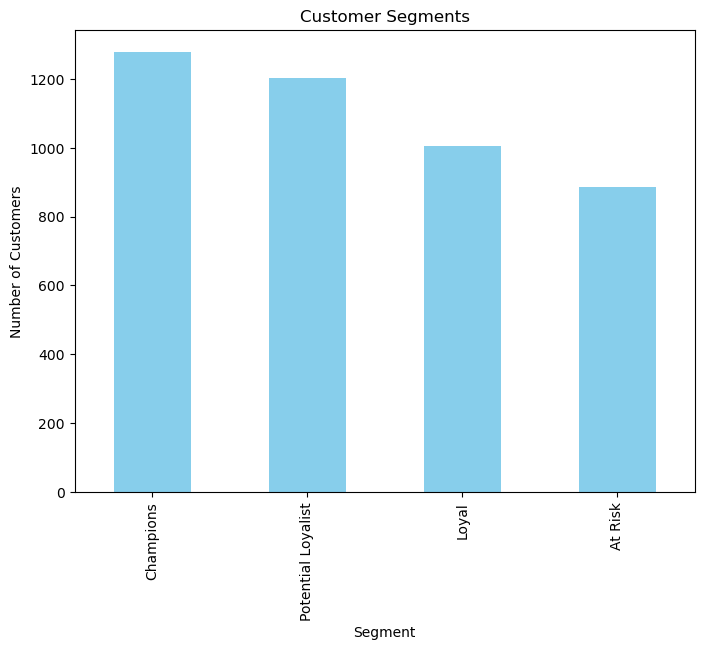

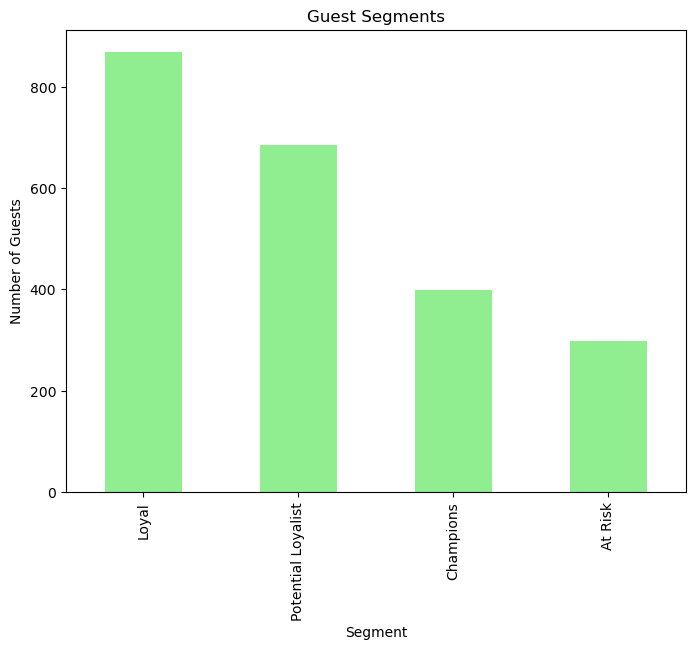

In [50]:
# Plot customer segment distribution
rfm_customers['Segment'].value_counts().plot(kind='bar', title='Customer Segments', color='skyblue', figsize=(8, 6))
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.savefig('Customer Segments')
plt.show()

# Plot guest segment distribution
rfm_guest['Segment'].value_counts().plot(kind='bar', title='Guest Segments', color='lightgreen', figsize=(8, 6))
plt.xlabel("Segment")
plt.ylabel("Number of Guests")
plt.savefig('Guest Segments')
plt.show()

In [47]:
# After grouping by CustomerID and aggregating the data, reset the index
rfm_customers = rfm_customers.reset_index()

# Sort by Monetary value and get the top 10 customers
top_customers = rfm_customers.sort_values(by='Monetary', ascending=False).head(10)

# Display the top 10 customers with their respective values
print("Top 10 Customers by Monetary Value:")
print(top_customers[['CustomerID', 'Monetary']])


Top 10 Customers by Monetary Value:
      CustomerID       Monetary
1703     14646.0  280384.905443
4233     18102.0  256438.490000
3758     17450.0  187482.170000
1895     14911.0  133276.032065
55       12415.0  124825.082975
1345     14156.0  113384.140000
3801     17511.0   88125.380000
3202     16684.0   65892.080000
1005     13694.0   62653.100000
2192     15311.0   59419.340000


## Step 7: Insights And Recommendations.
1. **Top Products:** Promote best-selling products to attract more purchases.
2. **Sales Trends:** Identify high-sales months and plan campaigns.
3. **Customer Segments:**
   - Target Champions with loyalty programs.
   - Engage At-Risk customers with discounts.
   - Nurture Potential Loyalists with personalized offers.
